# Telecom Churn: Group Case Study

Submitted By: 

Abhilasha Mishra

Aishwarya Ram 

Suraj Hegde

Details about code: 

1. Telecom_Churn_Case_study_datacleaning_EDA_and_models_with_tuned_parameters : This file contains data cleaning EDA and models 
built based on the tuned hyper parameters. 

2. TelcomChurn_case_study_Logistic Regression_with_RFE : This file has the fine tuning of LR using RFE. 

3. Telecom_Churn_Case_study_datacleaning_PCA_LR : This file has the fine tuning for LR with PCA

4. Telecom_Churn_Case_study_Lasso_DecisionTree : This file has the fine tuning for DT with Lasso

5. Telecom_Churn_Case_study_Lasso_RandomForest : This file has the fine tuning for RF with Lasso

# Scope and problem definition:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition 

#Types of Churn: 

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. 


Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

# Cleaning data and performing EDA

In this file we will only concentrate on creating a cleaned data set which will be used by us for the model building. 

Once the data cleaning is completed we will create a new .csv file which will be used for the subsequent model building and analysis


### Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Importing the datasets
churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
print(len(churn_data))

99999


### Let's understand the structure of our dataframe

In [4]:
# Let's see the head of our master dataset
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [5]:
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Checking For missing values. 

We have 2 types of data here categorical and numneric. We will either use deletion or imputation method to either delete or add mean/median/avg as needed.

In [7]:
##Printing the percentage missing values. 
miss = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(miss)
print(miss[miss>60])

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [8]:
##We have quite a few missing values in the dataset
##From this we can see the categorical caiables "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"
## have ~74% missingdata, but as these are categorical we will replace them with 2 which will serve as a new category and derive 
##dummy variables from this.
cat_var = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]
for a in cat_var:
    churn_data[a].fillna(value=2, inplace=True)

In [9]:
# Dummy variable creation
dummy_night_6 = pd.get_dummies(churn_data['night_pck_user_6'],prefix="night_pck_6",drop_first=True)
dummy_night_7 = pd.get_dummies(churn_data['night_pck_user_7'],prefix="night_pck_7",drop_first=True)
dummy_night_8 = pd.get_dummies(churn_data['night_pck_user_8'],prefix="night_pck_8",drop_first=True)

dummy_fb_6 = pd.get_dummies(churn_data['fb_user_6'],prefix="fb_6", drop_first=True)
dummy_fb_7 = pd.get_dummies(churn_data['fb_user_7'],prefix="fb_7",drop_first=True)
dummy_fb_8 = pd.get_dummies(churn_data['fb_user_8'],prefix="fb_8",drop_first=True)

churn_data = pd.concat([churn_data,dummy_night_6],axis=1)
churn_data = pd.concat([churn_data,dummy_night_7],axis=1)
churn_data = pd.concat([churn_data,dummy_night_8],axis=1)

churn_data = pd.concat([churn_data,dummy_fb_6],axis=1)
churn_data = pd.concat([churn_data,dummy_fb_7],axis=1)
churn_data = pd.concat([churn_data,dummy_fb_8],axis=1)

# drop all categorial columns
churn_data = churn_data.drop(["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"],1)

In [10]:
##Printing the percentage missing values. 
miss = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(miss)
print("------------------------------------------")
print(miss[miss>60])

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
                        ... 
monthly_2g_9            0.00
sachet_2g_6             0.00
sachet_2g_7             0.00
sachet_2g_8   

In [11]:
##From the above list now we see we still have ultiple columns with missing data above 70%
##Out of this we cant drop "total_rech_data_6",'total_rech_data_7","total_rech_data_8","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8"
## As these columns are needed to identify the high value customers. 
## As we do not have any values against these and it is related to rechange it is safe to replace the missing 
## values with "0"

churn_data.total_rech_data_6.fillna(value=0, inplace=True)
churn_data.total_rech_data_7.fillna(value=0, inplace=True)
churn_data.total_rech_data_8.fillna(value=0, inplace=True)
churn_data.total_rech_data_9.fillna(value=0, inplace=True)

churn_data.av_rech_amt_data_6.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_7.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_8.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [12]:
##We will now drop the remaning columns with more than 70% of missing data
miss = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
drop_columns_ist = miss[miss >70].index
churn_data.drop(drop_columns_ist,axis=1, inplace=True)

In [13]:
##Printing the percentage missing values. 
miss = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(miss)
print("------------------------------------------")
print(miss[miss>60])

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
                        ... 
monthly_2g_9            0.00
sachet_2g_6             0.00
sachet_2g_7             0.00
sachet_2g_8   

In [14]:
##Now let us check the rows for missing values. 
churn_data.isnull().all(axis=1).sum()
print(churn_data.shape)

(99999, 206)


There are no columns with all null values however there might be columns with high missing values. We will check these once
we have filtered the high value customers and also once we have the churn tags asigned. 

In [15]:
##Filtering the high value customers
##To do this we first need to find the total data reachge amount, which we can find by multiplying the total_rech_data_* 
## with av_rech_amt_data*. Once we have this we will calculate the avg for 2 months and find the 70th percentile of
## average. Once we have the 70th percentile we will check each value in column which has the avg and keep only once
## equal or above the 70th percentile

##First lets find the total data rechange amount for month 6 and 7
churn_data["total_data_amt_6"] = churn_data["total_rech_data_6"]*churn_data['av_rech_amt_data_6']
churn_data["total_data_amt_7"] = churn_data["total_rech_data_7"]*churn_data['av_rech_amt_data_7']
churn_data["total_data_amt_8"] = churn_data["total_rech_data_8"]*churn_data['av_rech_amt_data_8']
churn_data["total_data_amt_9"] = churn_data["total_rech_data_9"]*churn_data['av_rech_amt_data_9']

churn_data.drop(["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"],axis=1, inplace=True)

In [16]:
## Finding the highvalue customers
avg_reacarge_Good_Phase = (churn_data["total_data_amt_6"] + churn_data["total_data_amt_7"] + churn_data["total_rech_amt_6"] + churn_data["total_rech_amt_7"]) / 2.0
baseline_high_value = np.percentile(avg_reacarge_Good_Phase,70.0)
churn_data=churn_data[avg_reacarge_Good_Phase >= baseline_high_value]

In [17]:
print(churn_data.shape)

(30001, 202)


In [18]:
##Now that we have data which has high value customers, lets find tag the users as churn or not churn
## as per the guidelines of the case study ie "total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"
## We will add all these columns to create a variable and bsaed on this value we wwill tag the rows as churm = 1 or 
## nochurn = 0

churn_indicator = churn_data["total_ic_mou_9"]+churn_data["total_og_mou_9"]+churn_data["vol_2g_mb_9"]+churn_data["vol_3g_mb_9"]
churn_data['churn']=np.where(churn_indicator,0,1)


In [19]:
##As we have created the churn tag next step is to drop all the columns related to month 9
columns_9_month = [col_list for col_list in list(churn_data) if col_list.endswith("_9")]
churn_data.drop(columns_9_month, axis=1, inplace=True)
churn_data.drop(['sep_vbc_3g'],axis=1, inplace=True)

In [20]:
##Now let is check the rows with missing values again 
row_miss = churn_data.isnull().sum(axis=1)
row_miss[row_miss > 25]

0        58
77       29
111      29
188      31
358      29
364      29
414      30
423      29
527      29
539      58
687      91
690      30
723      31
788      29
845      31
895      29
933      29
934      29
1138     58
1255     29
1489     58
1500     59
1524     31
1555     62
1623     29
1754     29
1768     29
1877     29
1952     31
2063     29
         ..
98254    29
98271    29
98317    29
98420    29
98612    29
98635    30
98790    59
98823    30
98872    30
98943    90
98962    29
99000    29
99034    29
99070    29
99135    90
99142    87
99195    29
99246    29
99296    29
99323    29
99338    90
99391    29
99398    30
99436    31
99611    29
99625    29
99700    29
99790    59
99827    29
99851    62
Length: 1497, dtype: int64

In [21]:
##Dropping all the rows with more than 25 mising values.
churn_data = churn_data[churn_data.isnull().sum(axis=1) < 25]

In [22]:
##Again checking the missing values for the columns
##Printing the percentage missing values. 
miss = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(miss[miss>0])

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64


In [23]:
## These 3 columns represent only the date of the last recharge, which might be a key attribute as if we can calculate 
## last day of the month - date_of_last_rech_* we can calculte number of days before month end, usually for pre paid the plans
## end by the month so customers recharge to keep the plans on. 
##Converting it to datetime format
churn_data['date_of_last_rech_6']= pd.to_datetime(churn_data['date_of_last_rech_6'])
churn_data['date_of_last_rech_6']= pd.to_datetime(churn_data['date_of_last_rech_6'])
churn_data['date_of_last_rech_6']= pd.to_datetime(churn_data['date_of_last_rech_6'])


In [24]:
## Calculating number of days
last_6=datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_7=datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_8= datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")
churn_data['days_forrech_before_month_end_6'] = (last_6 - churn_data['date_of_last_rech_6'] ).astype('timedelta64[D]')
churn_data['days_forrech_before_month_end_7'] = ( last_7- churn_data['date_of_last_rech_6'] ).astype('timedelta64[D]')
churn_data['days_forrech_before_month_end_8'] = ( last_8- churn_data['date_of_last_rech_6'] ).astype('timedelta64[D]')

In [25]:
##Lets now drop the columns with date
churn_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [26]:
miss = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(miss[miss>0])

days_forrech_before_month_end_6    0.12
days_forrech_before_month_end_7    0.12
days_forrech_before_month_end_8    0.12
dtype: float64


In [27]:
## We still have mising values, they need to be imputed with mean values
churn_data.loc[np.isnan(churn_data['days_forrech_before_month_end_6']),['days_forrech_before_month_end_6']]=churn_data['days_forrech_before_month_end_6'].mean()
churn_data.loc[np.isnan(churn_data['days_forrech_before_month_end_7']),['days_forrech_before_month_end_7']]=churn_data['days_forrech_before_month_end_7'].mean()
churn_data.loc[np.isnan(churn_data['days_forrech_before_month_end_8']),['days_forrech_before_month_end_8']]=churn_data['days_forrech_before_month_end_8'].mean()

### Lets start the univariate analysis

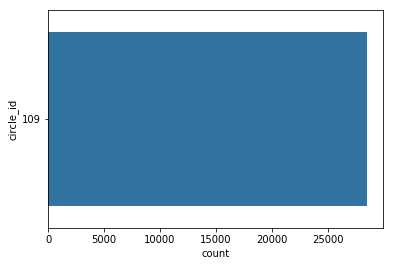

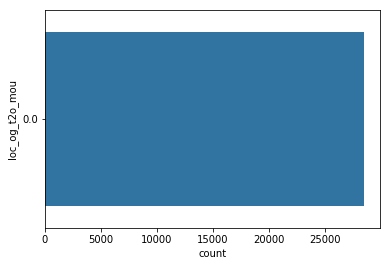

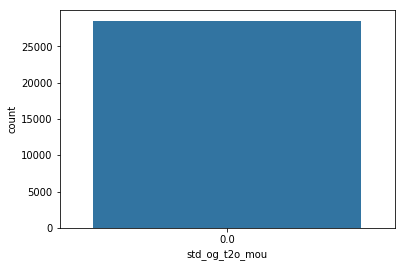

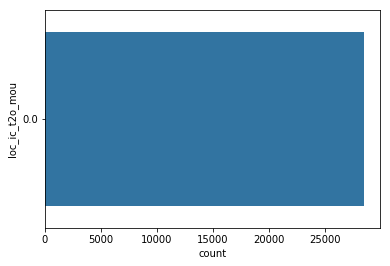

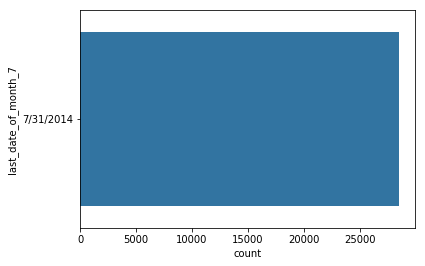

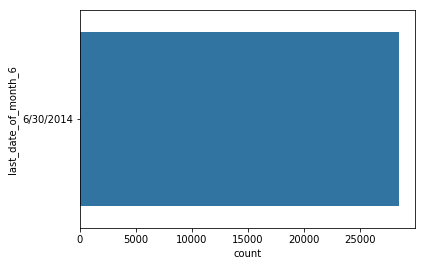

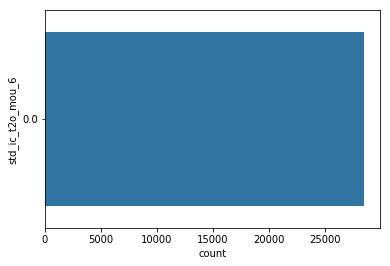

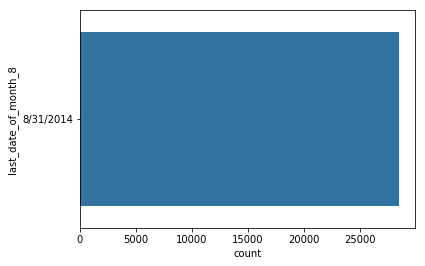

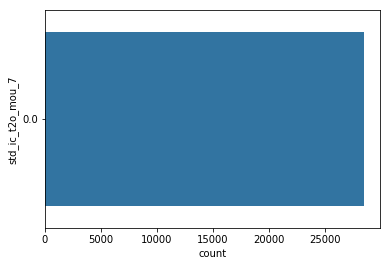

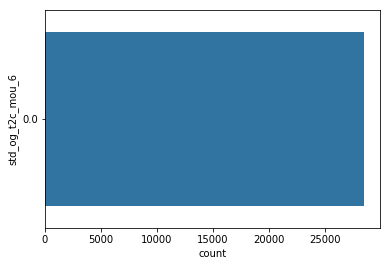

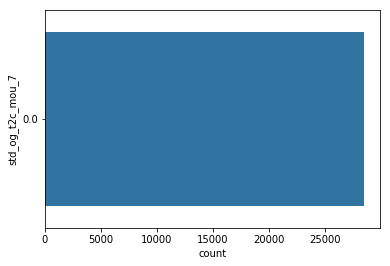

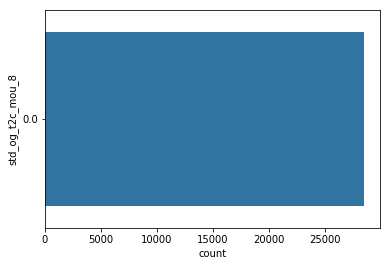

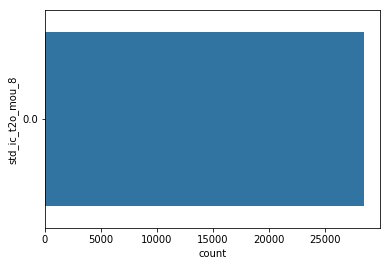

In [28]:
sns.countplot(y="circle_id",data=churn_data)
plt.show()

sns.countplot(y="loc_og_t2o_mou",data=churn_data)
plt.show()

sns.countplot(x="std_og_t2o_mou",data=churn_data)
plt.show()

sns.countplot(y="loc_ic_t2o_mou",data=churn_data)
plt.show()

sns.countplot(y="last_date_of_month_7",data=churn_data)
plt.show()

sns.countplot(y="last_date_of_month_6",data=churn_data)
plt.show()

sns.countplot(y="std_ic_t2o_mou_6",data=churn_data)
plt.show()

sns.countplot(y="last_date_of_month_8",data=churn_data)
plt.show()

sns.countplot(y="std_ic_t2o_mou_7",data=churn_data)
plt.show()

sns.countplot(y="std_og_t2c_mou_6",data=churn_data)
plt.show()

sns.countplot(y="std_og_t2c_mou_7",data=churn_data)
plt.show()

sns.countplot(y="std_og_t2c_mou_8",data=churn_data)
plt.show()

sns.countplot(y="std_ic_t2o_mou_8",data=churn_data)
plt.show()

In [29]:
## From the analysis of above graphs we see that there are many columns whihc has very less variance which will not be
## analysis. Dropping the columns 

In [30]:
print(churn_data.last_date_of_month_7.value_counts())
print(churn_data.circle_id.value_counts())            
print(churn_data.loc_og_t2o_mou.value_counts())       
print(churn_data.std_og_t2o_mou.value_counts())       
print(churn_data.loc_ic_t2o_mou.value_counts())       
print(churn_data.last_date_of_month_6.value_counts()) 
print(churn_data.std_ic_t2o_mou_6.value_counts())     
print(churn_data.last_date_of_month_8.value_counts()) 
print(churn_data.std_ic_t2o_mou_7.value_counts())     
print(churn_data.std_og_t2c_mou_6.value_counts())     
print(churn_data.std_og_t2c_mou_7.value_counts())     
print(churn_data.std_og_t2c_mou_8.value_counts())     
print(churn_data.std_ic_t2o_mou_8.value_counts()) 

7/31/2014    28504
Name: last_date_of_month_7, dtype: int64
109    28504
Name: circle_id, dtype: int64
0.0    28504
Name: loc_og_t2o_mou, dtype: int64
0.0    28504
Name: std_og_t2o_mou, dtype: int64
0.0    28504
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    28504
Name: last_date_of_month_6, dtype: int64
0.0    28504
Name: std_ic_t2o_mou_6, dtype: int64
8/31/2014    28504
Name: last_date_of_month_8, dtype: int64
0.0    28504
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28504
Name: std_og_t2c_mou_6, dtype: int64
0.0    28504
Name: std_og_t2c_mou_7, dtype: int64
0.0    28504
Name: std_og_t2c_mou_8, dtype: int64
0.0    28504
Name: std_ic_t2o_mou_8, dtype: int64


In [31]:
##Dropping above columns as they have no varinace
churn_data.drop(['last_date_of_month_7'],axis=1, inplace=True)
churn_data.drop(['circle_id'],axis=1, inplace=True)            
churn_data.drop(['loc_og_t2o_mou'],axis=1, inplace=True)       
churn_data.drop(['std_og_t2o_mou'],axis=1, inplace=True)       
churn_data.drop(['loc_ic_t2o_mou'],axis=1, inplace=True)       
churn_data.drop(['last_date_of_month_6'],axis=1, inplace=True) 
churn_data.drop(['std_ic_t2o_mou_6'],axis=1, inplace=True)     
churn_data.drop(['last_date_of_month_8'],axis=1, inplace=True) 
churn_data.drop(['std_ic_t2o_mou_7'],axis=1, inplace=True)     
churn_data.drop(['std_og_t2c_mou_6'],axis=1, inplace=True)     
churn_data.drop(['std_og_t2c_mou_7'],axis=1, inplace=True)     
churn_data.drop(['std_og_t2c_mou_8'],axis=1, inplace=True)     
churn_data.drop(['std_ic_t2o_mou_8'],axis=1, inplace=True)


In [32]:
## Bivariate analysis
##checking data correlation
cor = churn_data.corr()
cor

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number                         1.000000  0.033922  0.025331  0.029794   
arpu_6                                0.033922  1.000000  0.717481  0.663516   
arpu_7                                0.025331  0.717481  1.000000  0.769991   
arpu_8                                0.029794  0.663516  0.769991  1.000000   
onnet_mou_6                           0.008875  0.343666  0.216187  0.160028   
onnet_mou_7                           0.003339  0.227770  0.315769  0.229720   
onnet_mou_8                           0.004306  0.200824  0.266403  0.339563   
offnet_mou_6                          0.017339  0.516198  0.363625  0.296203   
offnet_mou_7                          0.007464  0.356831  0.487917  0.376715   
offnet_mou_8                          0.014245  0.307798  0.395255  0.517551   
roam_ic_mou_6                         0.010610  0.120665  0.097828  0.094523   
roam_ic_mou_7                        -0.002831  0.087266  0.092003  0.077961   
roam_ic_mou_8                         0.004013  0.096381  0.091596  0.107180   
roam_og_mou_6                         0.005198  0.191755  0.140239  0.136298   
roam_og_mou_7                        -0.002480  0.151179  0.178974  0.143082   
roam_og_mou_8                        -0.004525  0.132664  0.151464  0.197133   
loc_og_t2t_mou_6                      0.046186  0.167727  0.104790  0.099814   
loc_og_t2t_mou_7                      0.042936  0.132166  0.153287  0.128039   
loc_og_t2t_mou_8                      0.042073  0.129936  0.131647  0.171527   
loc_og_t2m_mou_6                      0.075415  0.336023  0.216487  0.215444   
loc_og_t2m_mou_7                      0.073329  0.255962  0.296892  0.261309   
loc_og_t2m_mou_8                      0.076617  0.231605  0.250557  0.341277   
loc_og_t2f_mou_6                      0.048924  0.141450  0.110639  0.119485   
loc_og_t2f_mou_7                      0.050274  0.119906  0.134593  0.132282   
loc_og_t2f_mou_8                      0.054623  0.110673  0.118146  0.153675   
loc_og_t2c_mou_6                     -0.013468  0.043907  0.007229  0.001678   
loc_og_t2c_mou_7                     -0.014440  0.010183  0.035712  0.020016   
loc_og_t2c_mou_8                     -0.008200  0.012218  0.029452  0.050109   
loc_og_mou_6                          0.080696  0.331850  0.212962  0.209770   
loc_og_mou_7                          0.077769  0.256770  0.297558  0.258272   
...                                        ...       ...       ...       ...   
sachet_2g_8                          -0.037676 -0.155732 -0.140422 -0.088447   
monthly_3g_6                          0.010408  0.185666  0.102162  0.105386   
monthly_3g_7                          0.011327  0.100746  0.198614  0.129754   
monthly_3g_8                          0.018497  0.117341  0.140069  0.223098   
sachet_3g_6                          -0.015118  0.000185 -0.024405 -0.019298   
sachet_3g_7                          -0.014496 -0.022498  0.009659 -0.002253   
sachet_3g_8                          -0.010149 -0.014593 -0.000171  0.043666   
aon                                   0.315375  0.037535  0.020666  0.055398   
aug_vbc_3g                           -0.031351  0.064450  0.080482  0.138133   
jul_vbc_3g                           -0.028307  0.064269  0.101784  0.084851   
jun_vbc_3g                           -0.034185  0.112136  0.060447  0.079092   
night_pck_6_1.0                      -0.014395  0.013834 -0.002263 -0.005080   
night_pck_6_2.0                       0.011208  0.119928  0.176843  0.127305   
night_pck_7_1.0                      -0.014788 -0.005413  0.006868  0.001793   
night_pck_7_2.0                       0.010255  0.189688  0.124913  0.113067   
night_pck_8_1.0                      -0.009214  0.011463  0.017721  0.026714   
night_pck_8_2.0                       0.001140  0.121215  0.098704  0.004020   
fb_6_1.0                             -0.018172 -0.120726 -0.175933 -0.127181   
fb_6_2.0                         

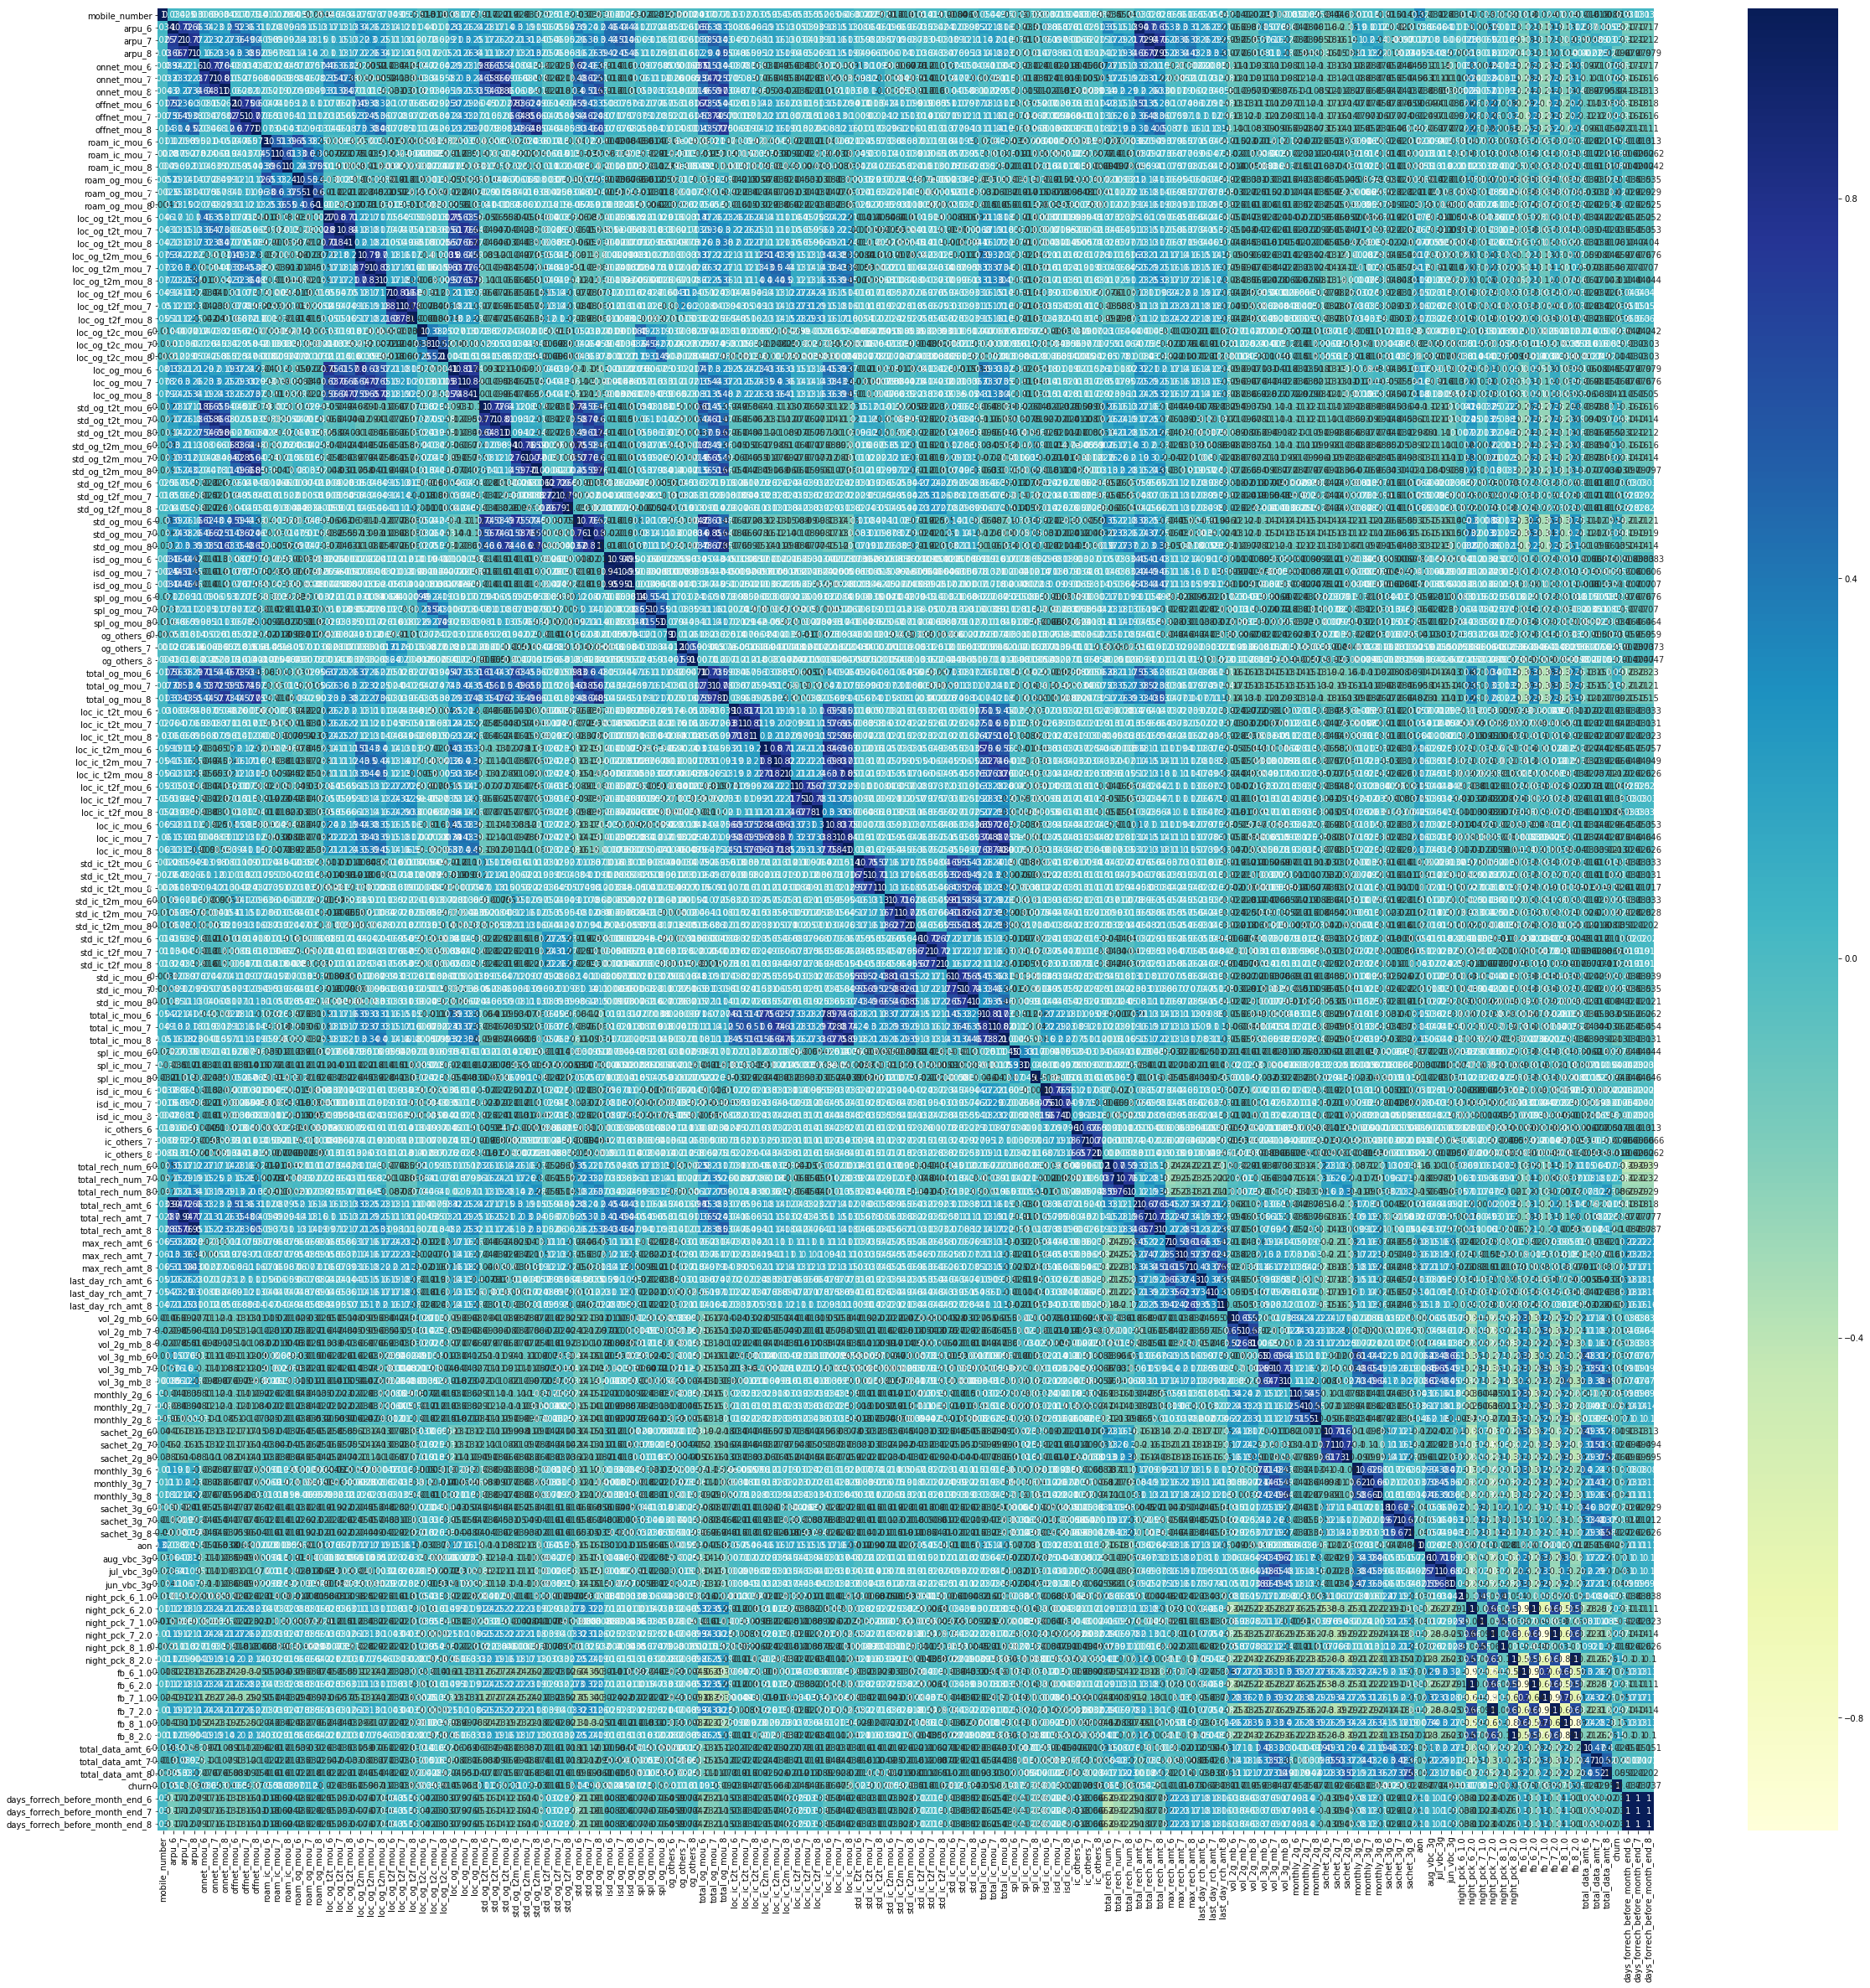

In [33]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,40))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [34]:
corr_list = churn_data.corr().unstack().sort_values().drop_duplicates()
corr_list[corr_list>0.80]

loc_og_mou_6                     loc_og_t2m_mou_6                   0.801425
std_og_t2t_mou_8                 std_og_t2t_mou_7                   0.805032
onnet_mou_8                      onnet_mou_7                        0.808932
loc_ic_t2t_mou_7                 loc_ic_t2t_mou_6                   0.809160
total_ic_mou_7                   total_ic_mou_6                     0.811288
loc_ic_t2t_mou_7                 loc_ic_t2t_mou_8                   0.811556
loc_og_mou_6                     loc_og_mou_7                       0.811883
std_ic_t2m_mou_6                 std_ic_mou_6                       0.812954
loc_og_t2f_mou_6                 loc_og_t2f_mou_7                   0.813785
loc_ic_t2m_mou_7                 loc_ic_t2m_mou_8                   0.815917
std_ic_t2m_mou_7                 std_ic_mou_7                       0.819055
total_ic_mou_7                   total_ic_mou_8                     0.824267
offnet_mou_6                     std_og_t2m_mou_6                   0.826971

In [35]:
churn_data.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'fb_7_2.0', 'fb_8_1.0', 'fb_8_2.0', 'total_data_amt_6',
       'total_data_amt_7', 'total_data_amt_8', 'churn',
       'days_forrech_before_month_end_6', 'days_forrech_before_month_end_7',
       'days_forrech_before_month_end_8'],
      dtype='object', length=144)

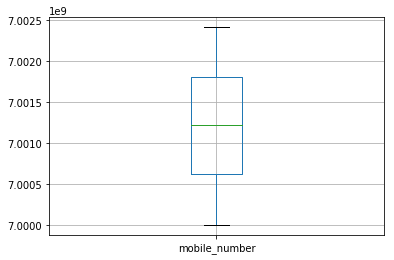

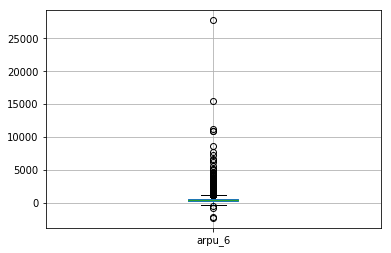

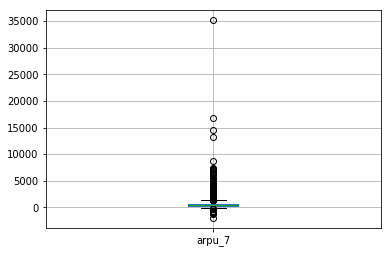

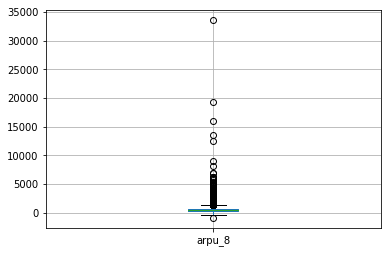

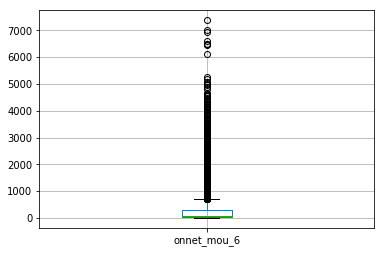

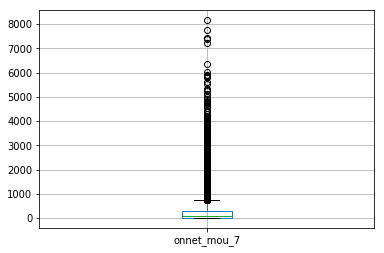

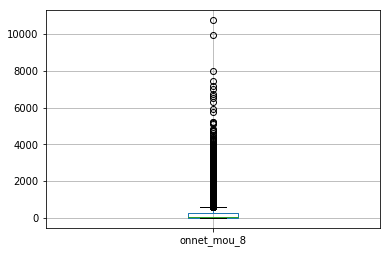

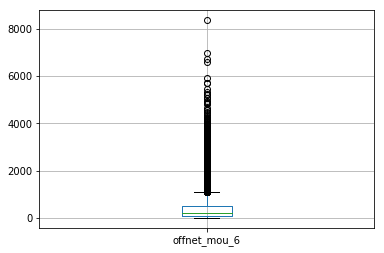

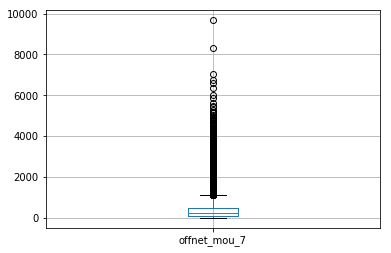

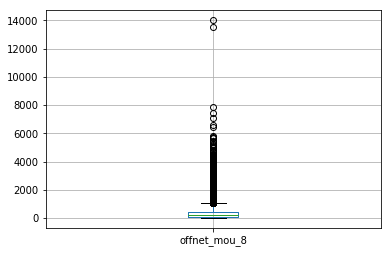

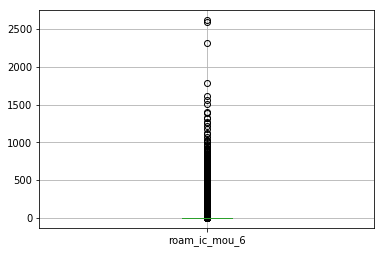

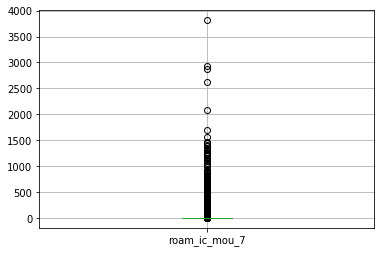

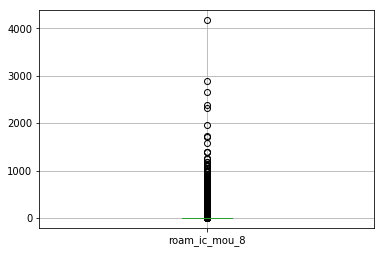

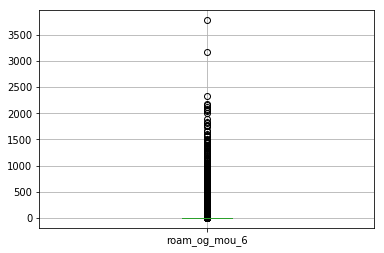

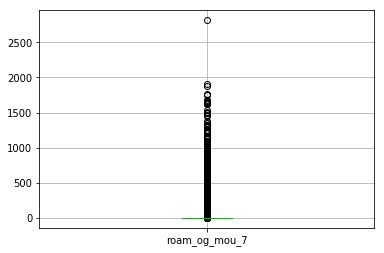

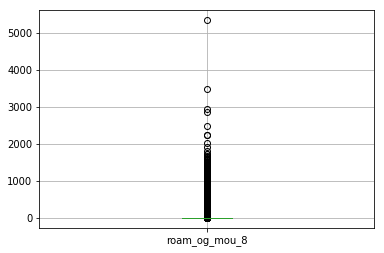

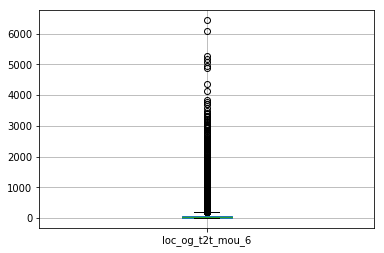

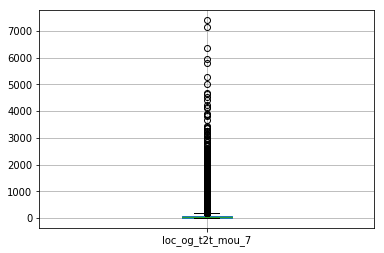

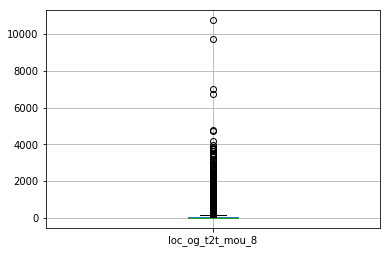

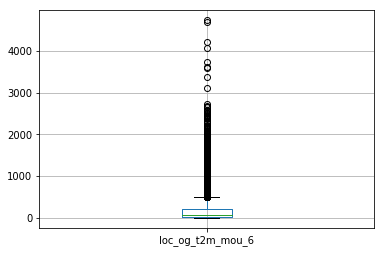

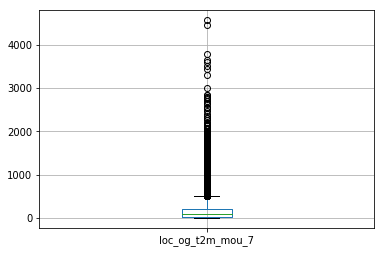

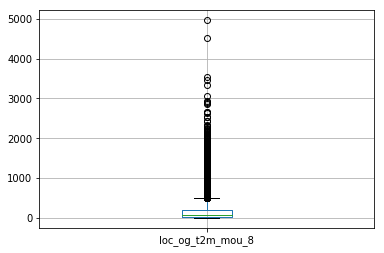

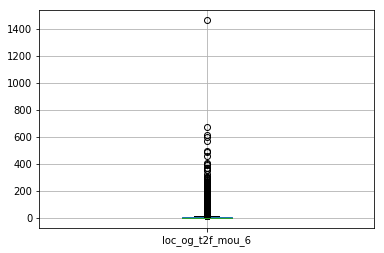

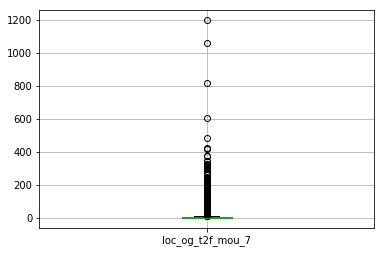

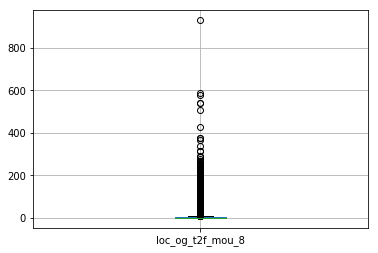

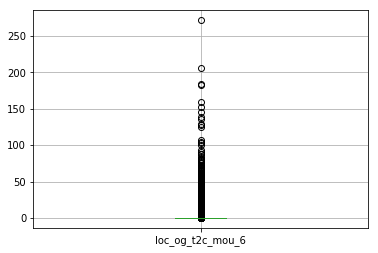

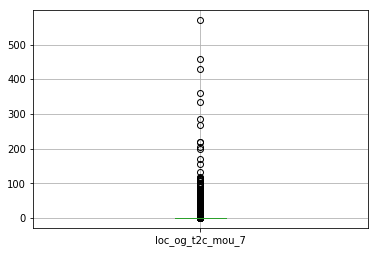

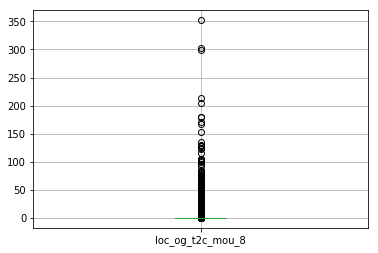

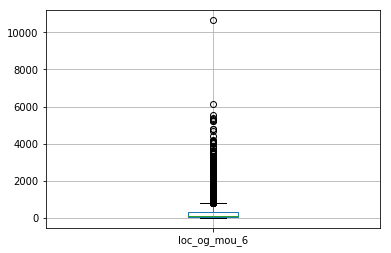

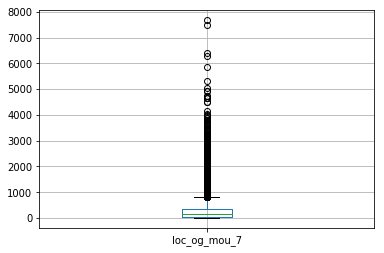

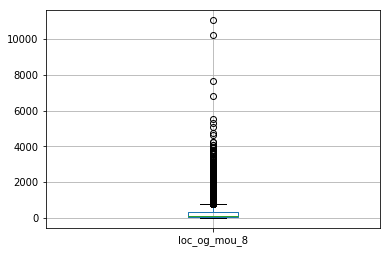

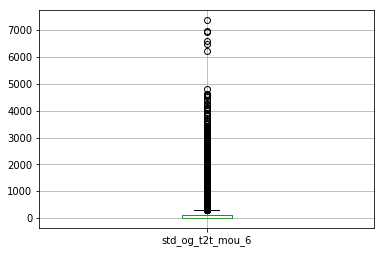

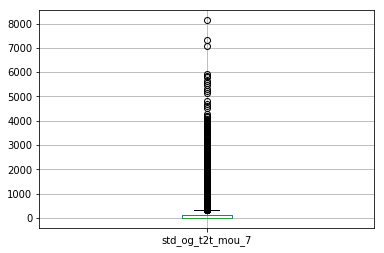

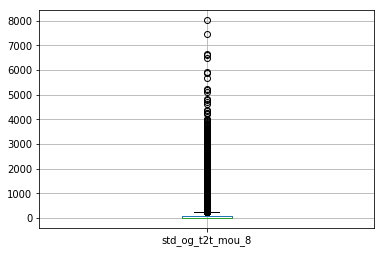

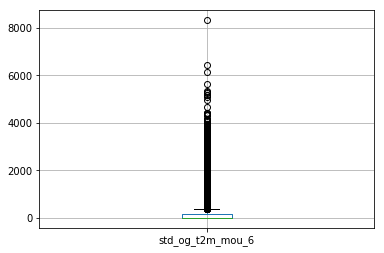

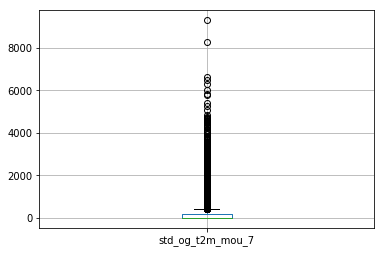

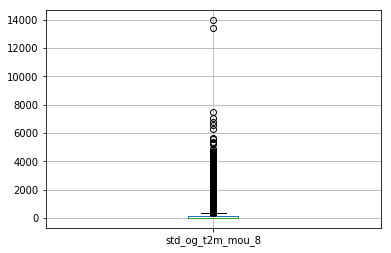

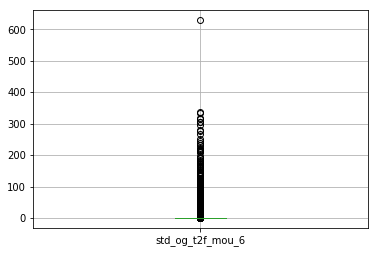

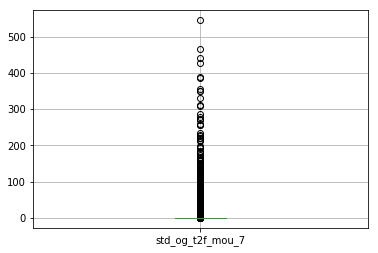

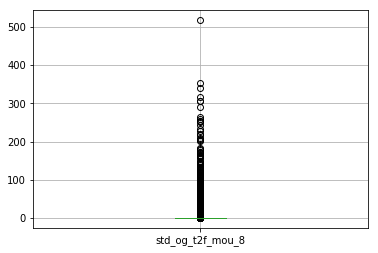

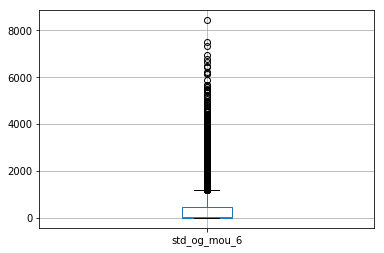

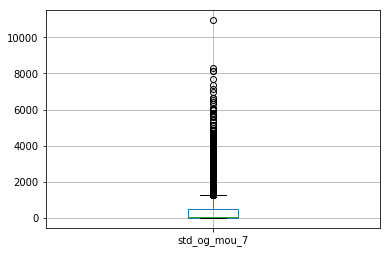

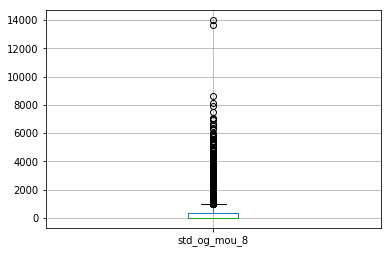

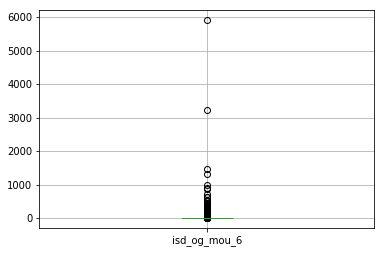

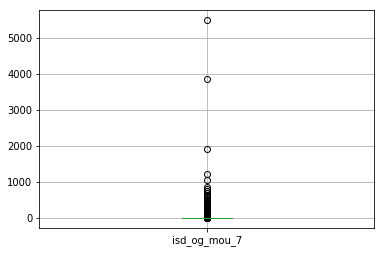

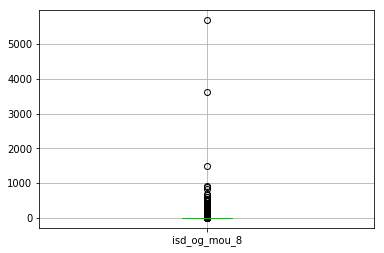

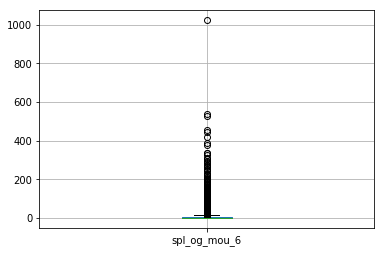

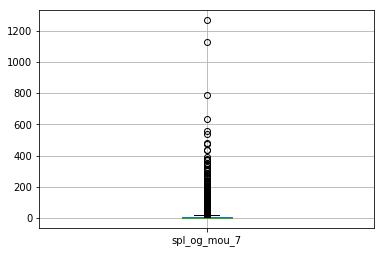

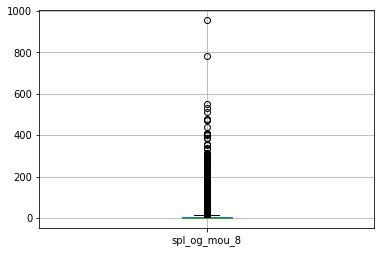

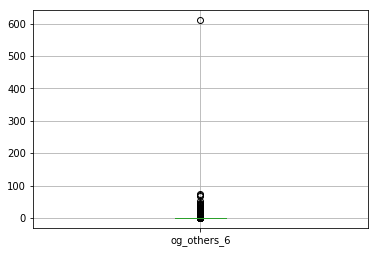

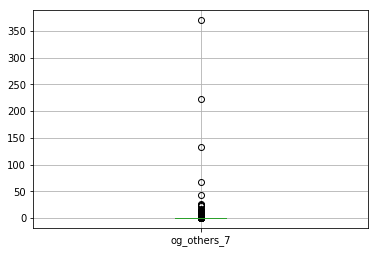

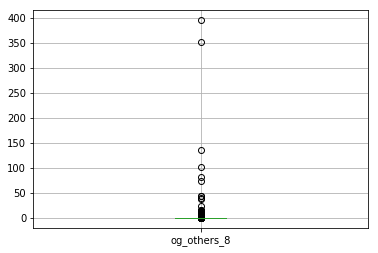

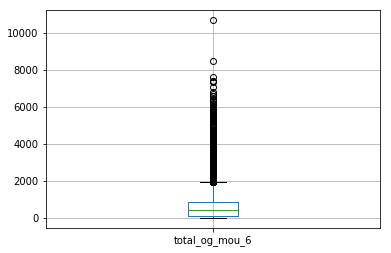

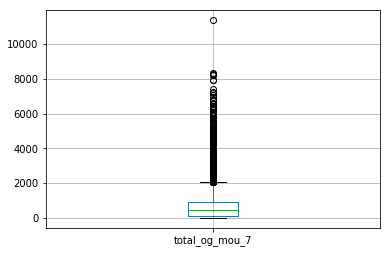

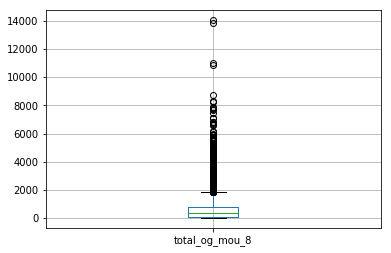

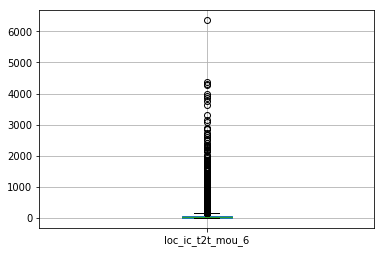

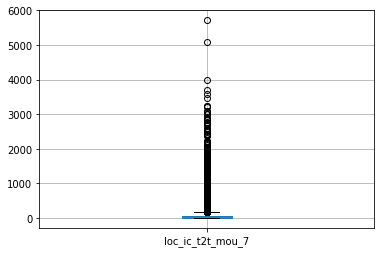

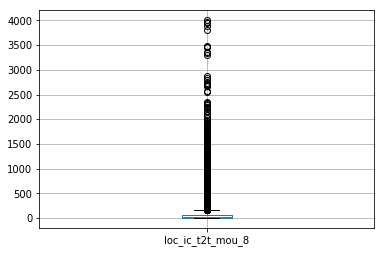

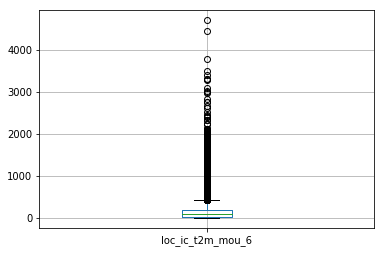

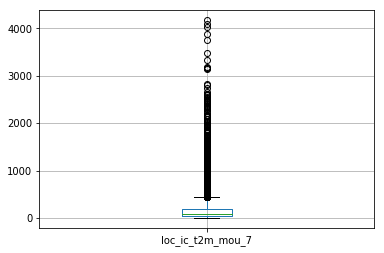

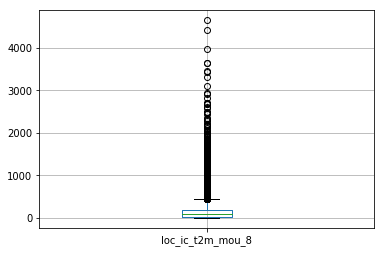

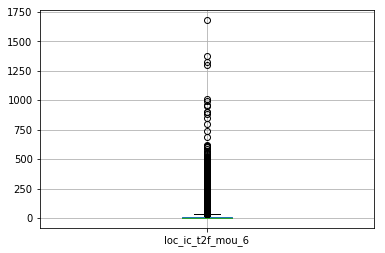

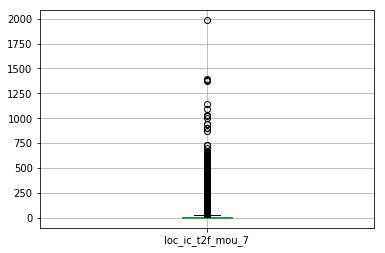

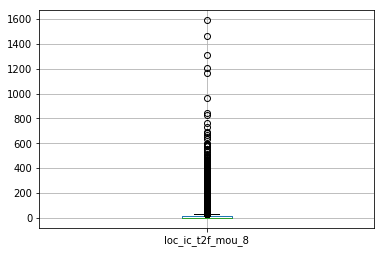

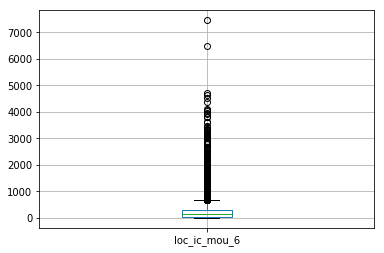

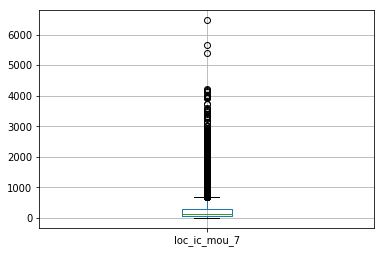

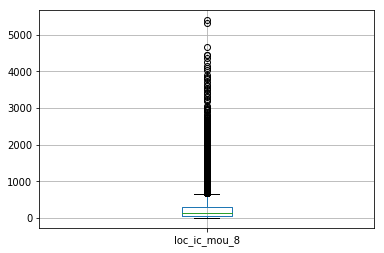

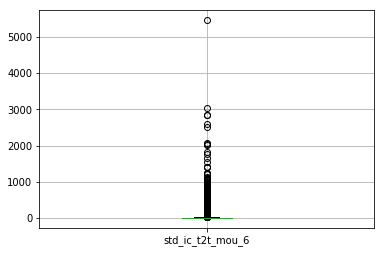

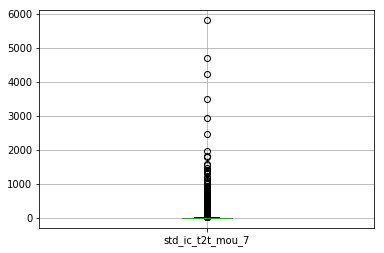

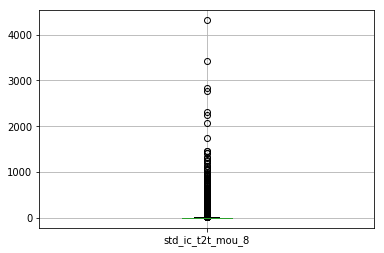

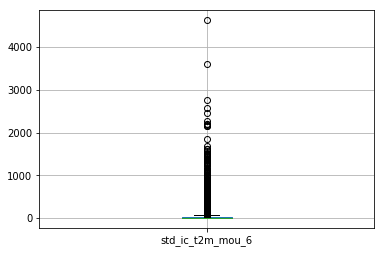

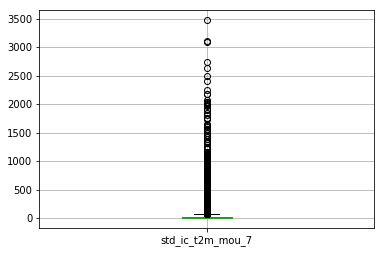

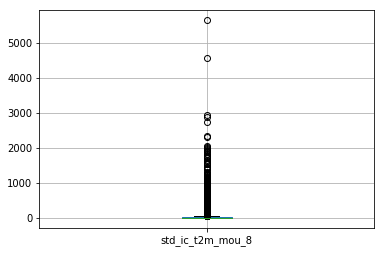

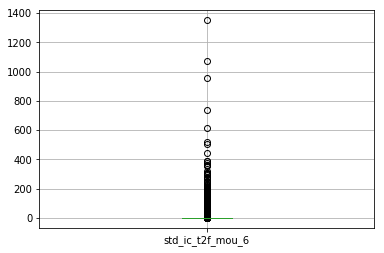

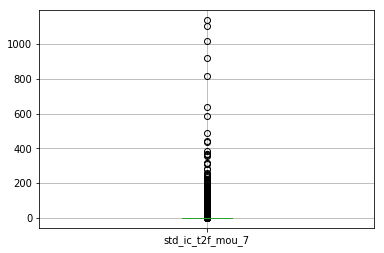

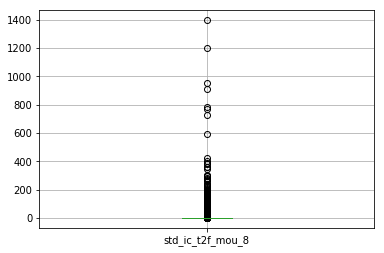

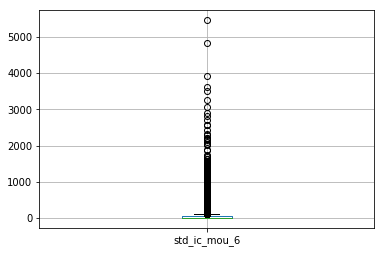

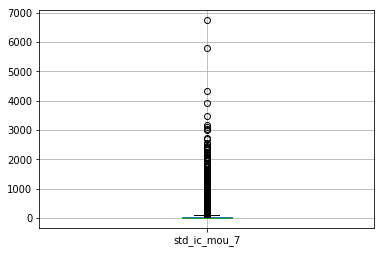

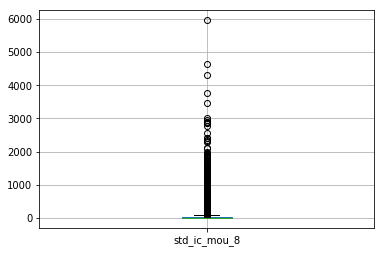

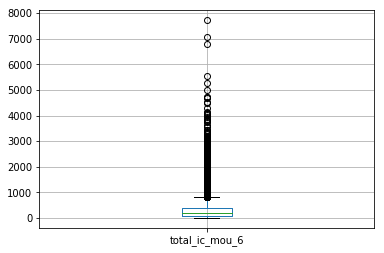

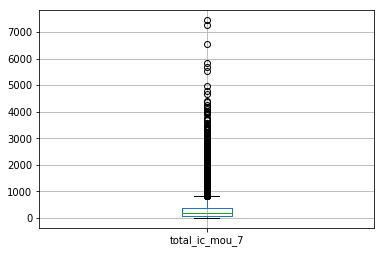

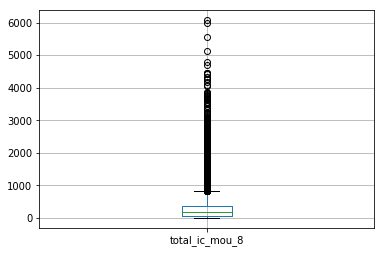

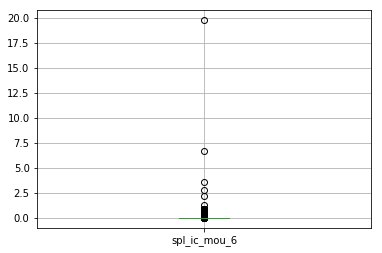

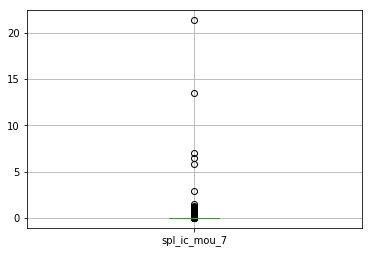

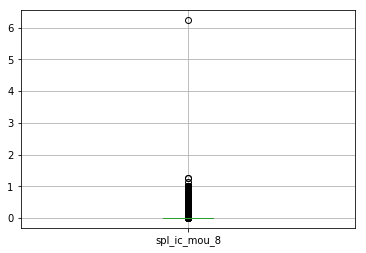

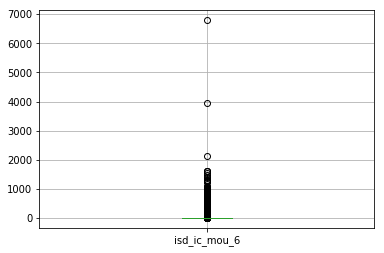

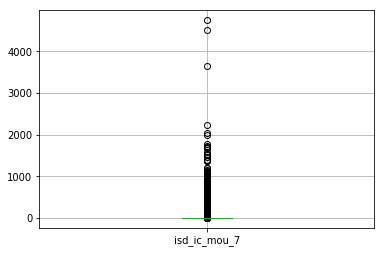

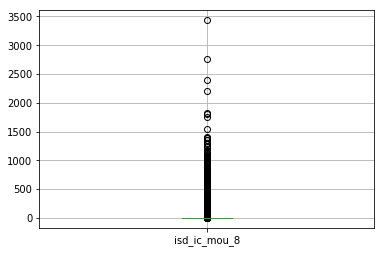

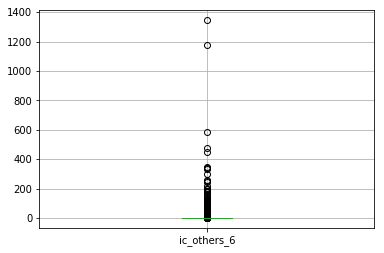

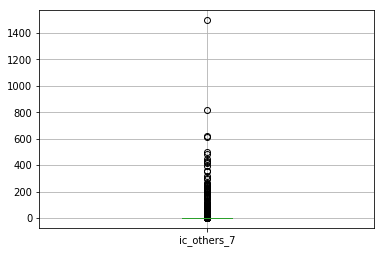

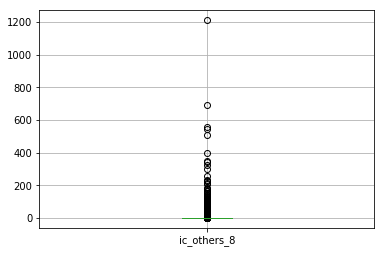

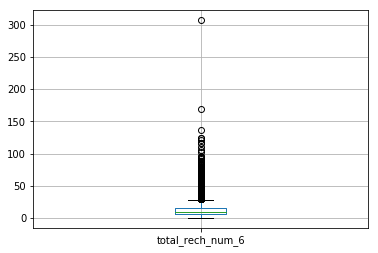

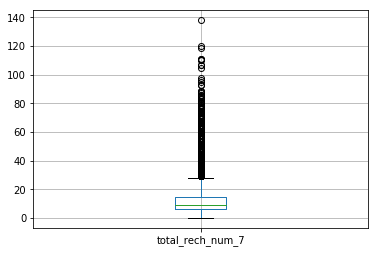

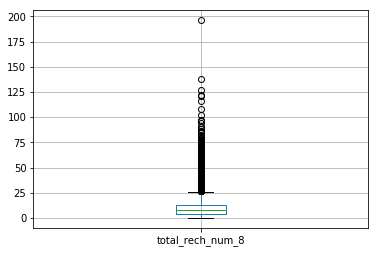

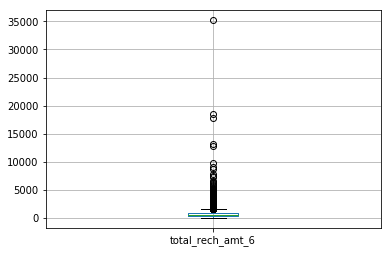

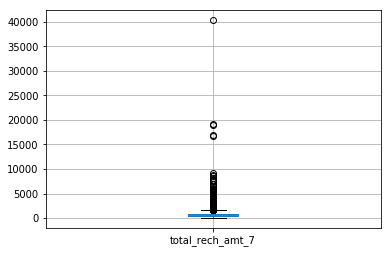

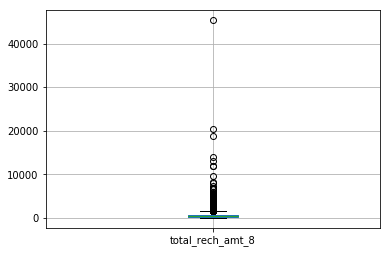

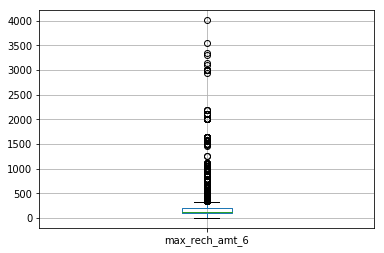

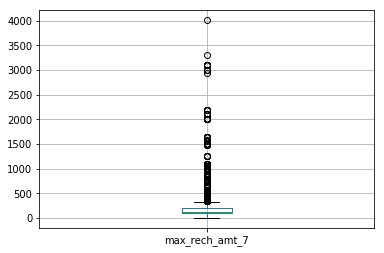

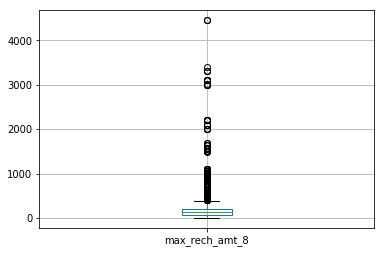

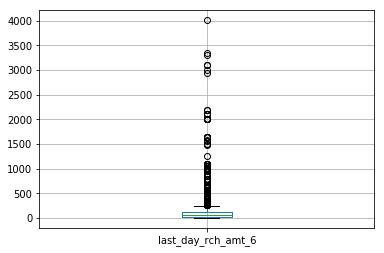

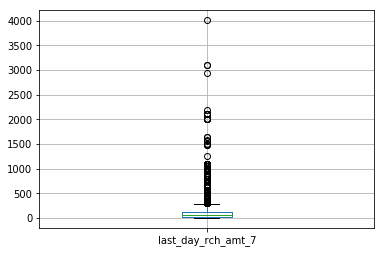

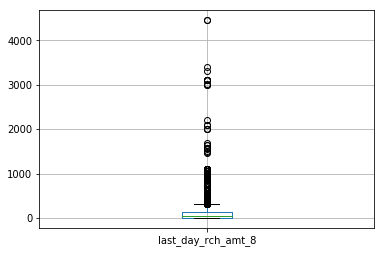

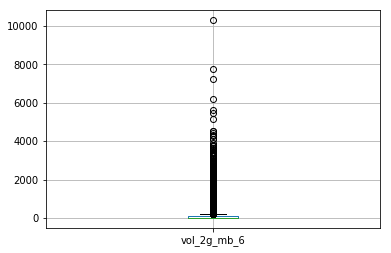

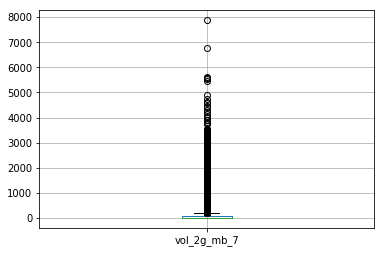

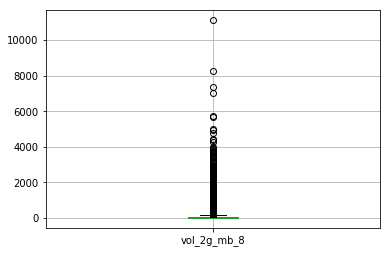

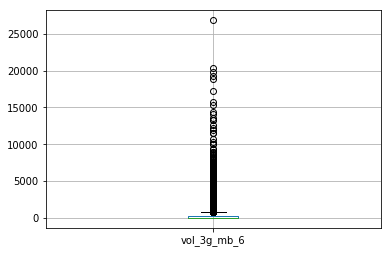

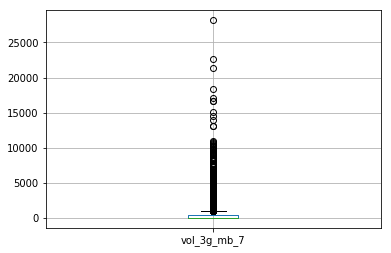

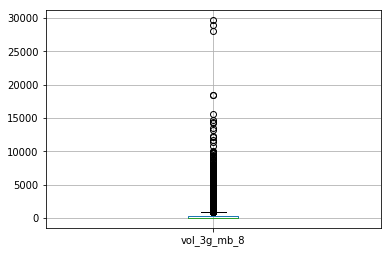

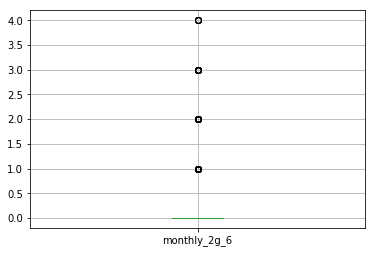

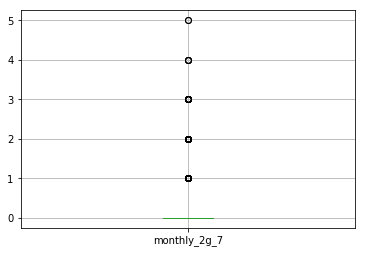

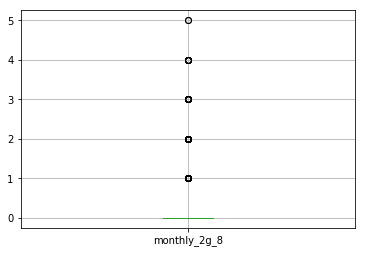

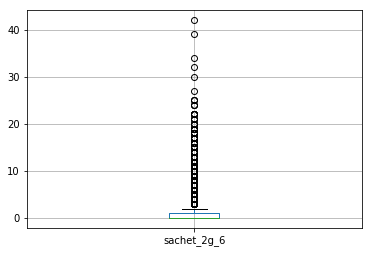

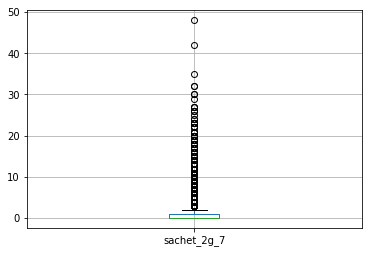

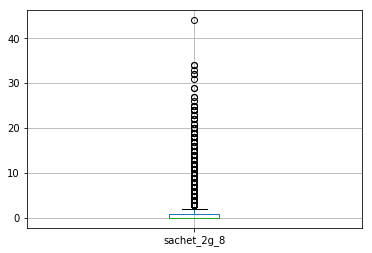

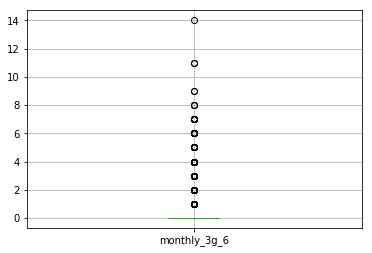

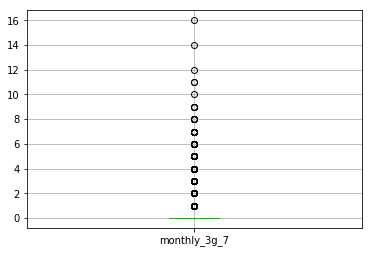

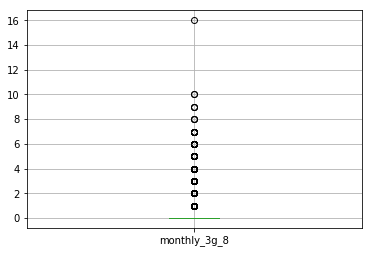

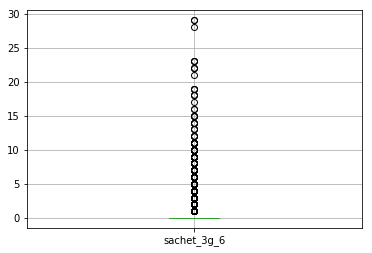

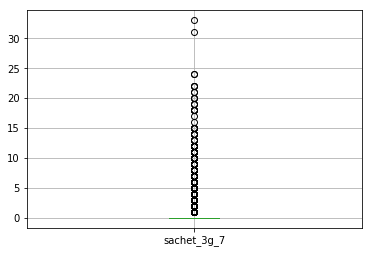

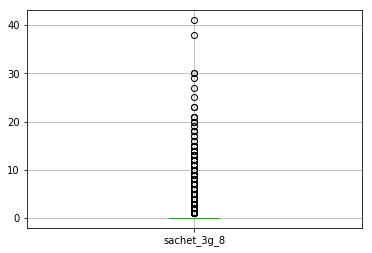

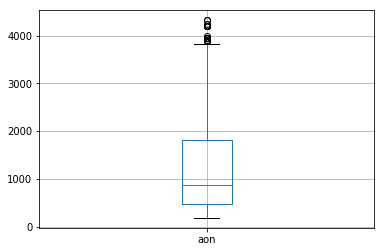

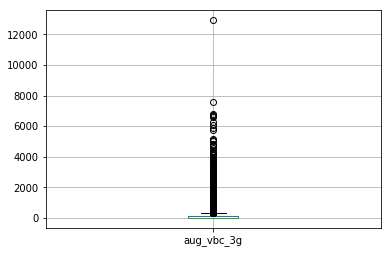

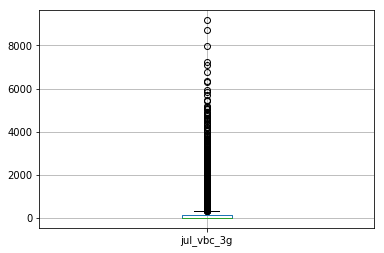

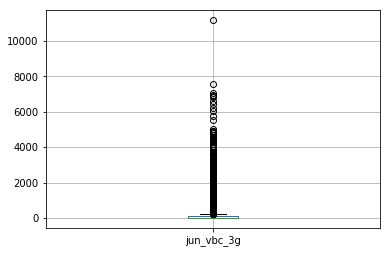

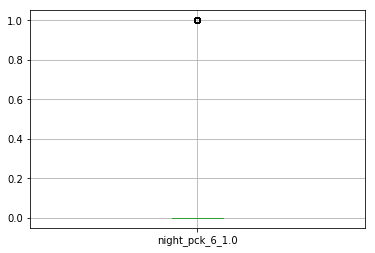

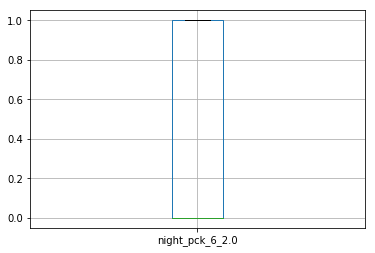

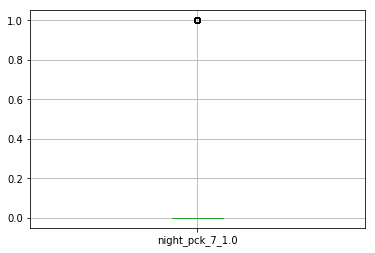

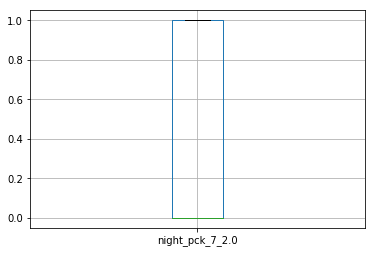

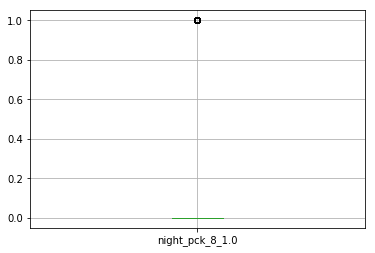

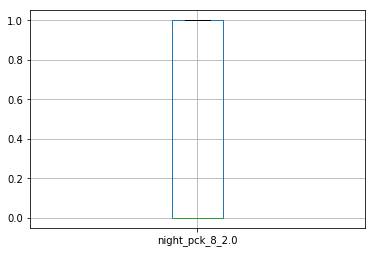

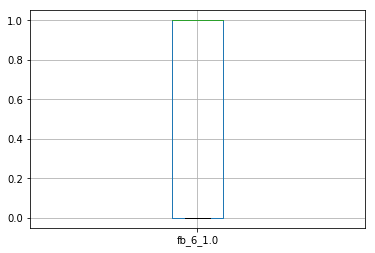

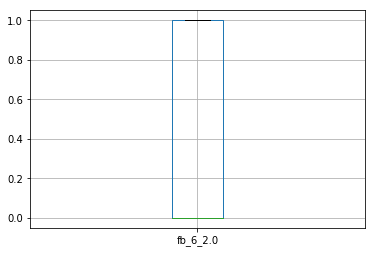

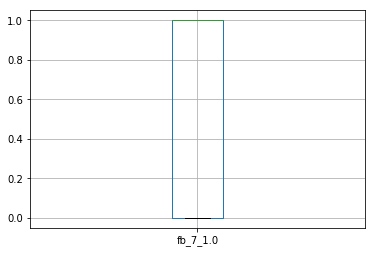

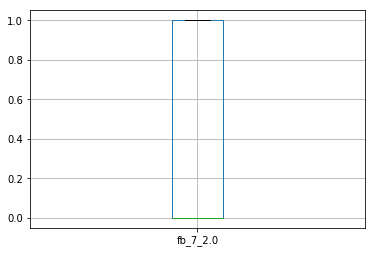

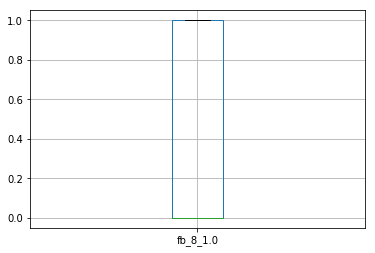

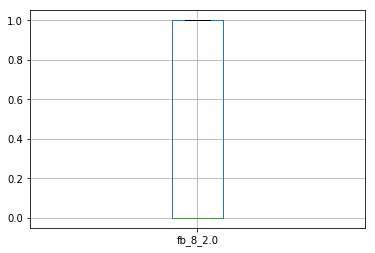

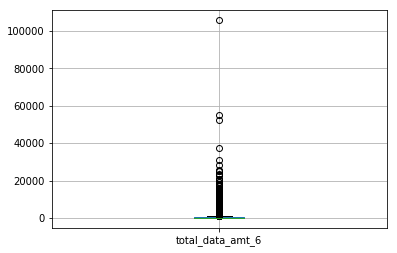

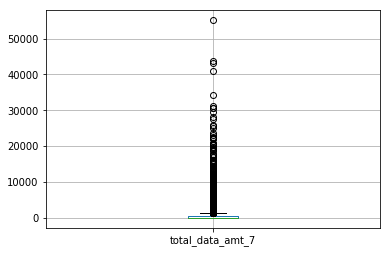

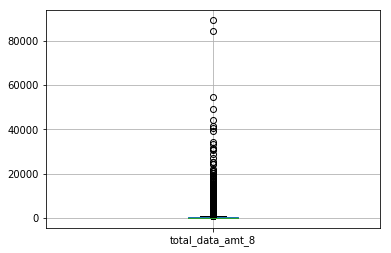

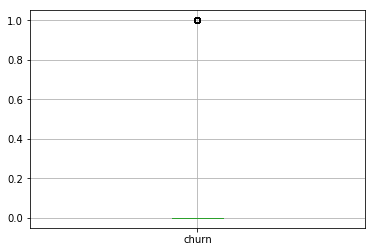

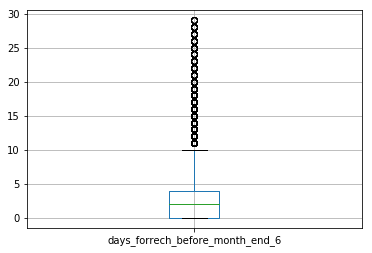

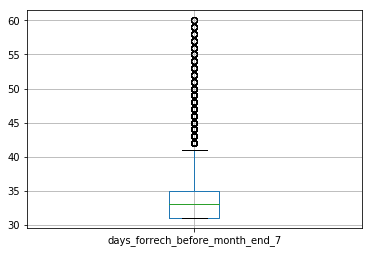

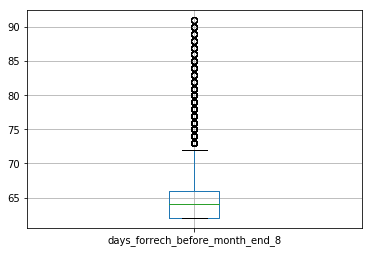

In [36]:
## Plotting boxplot to check for outliers


col_list = churn_data.columns
for col in col_list:
    churn_data.boxplot(col)
    plt.show()

In [37]:
##Checking the ratio of churn and no churn in the dataset
churn_data.churn.value_counts()

0    26908
1     1596
Name: churn, dtype: int64

## Conclusion of EDA and data cleaning

We see that most of the data which we have is non churn, only 1500 entries are for churn. So there is imbalance in data

Also we see that the there are many columns which have high correlation which needs to be worked upon.

In [38]:
##Now that we have the data cleaned, lets create a new file using the DF which will be used for further analysis. 

churn_data.to_csv("churn_data_cleaned.csv",sep=',',index= False)

# Model's for which we have already tuned the parameters

## Logistic regression with RFE

We will be using the RFE for feature reduction

We will use SMOTE and Tomek links techniques to handle the data imbalance

LR will be used as the method to build the model. 

In [39]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

## Importing the data and adding it to the df

churn_data = pd.read_csv("churn_data_cleaned.csv")

# Putting feature variable to X
X = churn_data.drop(['churn','mobile_number'], axis=1)

# Putting response variable to y
y = churn_data['churn']

## Standardizing the X df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

# combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques

smt = SMOTETomek(ratio='auto')
X_train_balance, y_train_balance = smt.fit_sample(X_train,y_train)

## Performing RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train_balance, y_train_balance)

list(zip(X.columns, rfe.support_, rfe.ranking_))

##Choosing only the rfe selected feature as the set of columns

col = X.columns[rfe.support_]

print("")
print("The columns selected by RFE:")
print(col)

X_train_rfe = pd.DataFrame(data=X_train_balance).iloc[:, rfe.support_]
y_train_rfe = y_train_balance


X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train_rfe,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'churn':y_train_rfe, 'Churn_Prob':y_train_pred})


y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)

## Creating new DF with only RFE selected columns.

X_test = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
X_test.head()
X_test_sm = sm.add_constant(X_test)


##Performing predeiction on test data

y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

#Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)

print("")
print("--------------------")
print("Final Report:")
print("--------------------")


print("")
print("Confusion Matrix:")
print("")
print("Training data confusion matrix:")
print(metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted ))
print("")
print("Test data confusion matrix:")
print(metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted ))

print("")
print("Acuuracy Score:")
print("")
print("Training data Accuracy:")
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))
print("")
print("Test data Accuracy:")
print(metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\ana

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\skl


The columns selected by RFE:
Index(['arpu_7', 'arpu_8', 'offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2f_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aon', 'fb_8_1.0'],
      dtype='object')

--------------------
Final Report:
--------------------

Confusion Matrix:

Training data confusion matrix:
[[15554  3278]
 [ 3564 15268]]

Test data confusion matrix:
[[6711 1363]
 [  96  382]]

Acuuracy Score:

Training data Accuracy:
0.8183411214953271

Test data Accuracy:
0.8293966323666978


## Logistic regression with PCA

We will be using the PCA for feature reduction

We will use SMOTE and Tomek links techniques to handle the data imbalance

LR will be used as the method to build the model. 

In [40]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importing new datasets
churn_data = pd.read_csv("churn_data_cleaned.csv")

#Dropping Mobile_number and churn columns before standardixing the features
df = churn_data.drop(['mobile_number','churn'],axis=1)

##standardizing the values
normalized_df=(df-df.mean())/df.std()
new_df = churn_data[['mobile_number','churn']]
churn_data_norm = pd.concat([new_df,normalized_df],axis=1)
churn_data_norm.head()

##Splitting the data set to x and y

# Putting feature variable to X
X = churn_data_norm.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data_norm[['churn']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques

smt = SMOTETomek(ratio='auto')
X_train_balance, y_train_balance = smt.fit_sample(X_train,y_train)

#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

#Doing the PCA on the train data
pca.fit(X_train_balance)

colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
print(pcs_df.head(10))

#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

## Basis transformation - getting the data onto our PCs
df_train_pca = pca_final.fit_transform(X_train_balance)
df_train_pca.shape

#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

#Training the model on the train data
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_balance)


#Making prediction on the test data
pred_probs_train = model_pca.predict(df_train_pca)
pred_probs_test = model_pca.predict(df_test_pca)


print("-----------------")
print("Final results")
print("-----------------")
# Confusion Matric
print('Confusion Matrix:')
print("Trainign data confusion Matrix")
print(confusion_matrix(y_train_balance,pred_probs_train))
print("Test data confusion Matrix")
print(confusion_matrix(y_test,pred_probs_test))

print('Model Accuracy:')
print("Trainign data accuracy")
print(accuracy_score(y_train_balance,pred_probs_train))
print("Test data accuracy")
print(accuracy_score(y_test,pred_probs_test))

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        PC1       PC2        Feature
0  0.129150  0.108406         arpu_6
1  0.124354  0.133726         arpu_7
2  0.071420  0.164075         arpu_8
3  0.164897 -0.018412    onnet_mou_6
4  0.160289  0.002627    onnet_mou_7
5  0.107205  0.045004    onnet_mou_8
6  0.174774  0.062731   offnet_mou_6
7  0.176717  0.079589   offnet_mou_7
8  0.098860  0.107678   offnet_mou_8
9  0.024109 -0.007640  roam_ic_mou_6


C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-----------------
Final results
-----------------
Confusion Matrix:
Trainign data confusion Matrix
[[15181  3649]
 [ 3119 15711]]
Test data confusion Matrix
[[6507 1567]
 [  99  379]]
Model Accuracy:
Trainign data accuracy
0.8202867764206054
Test data accuracy
0.8051917680074836


# Decision tree for model building with lasso regression for feature Reduction

We will be using the Lasso method for feature reduction

We will use SMOTE and Tomek links techniques to handle the data imbalance

Decision tree will be used as the method to build the model. 

In [41]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Reading the csv file and putting it into dataframe
churn_data = pd.read_csv('churn_data_cleaned.csv')

# Putting feature variable to X
X = churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)


# combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_train_balance, y_train_balance = smt.fit_sample(X_train,y_train)


##Starting the Feature reduction using Lasso regression and using sklearns selectfrommodel library
from sklearn.svm import LinearSVC
#from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
 
linear_svc = LinearSVC(C=0.0001,penalty="l1", dual=False)
linear_svc_model = SelectFromModel(linear_svc)
linear_svc_model.fit(X_train_balance,y_train_balance)
X_train_lasso = linear_svc_model.transform(X_train_balance)
col_list = linear_svc_model.get_support(indices=True)
## Feature reduction using RFE
print(X_train_lasso.shape)

columns_after_lasso = list(X.columns[col_list])
print("Columns left after Lasso:")
print(columns_after_lasso)

## Lasso to reduce the features
X_train_fetaure_reduced= X_train_lasso
Y_train_fetaure_reduced= y_train_balance
X_test = pd.DataFrame(data=X_test).iloc[:, col_list]

# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)

## Fitting the training data to model
clf_gini.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)




# Printing confusion matrix and accuracy
y_pred_training = clf_gini.predict(X_train_fetaure_reduced)
y_pred_final = clf_gini.predict(X_test)

print("------------------------------")
print("Final Results:")
print("------------------------------")
print("Confusion Matric:")
print("Trainig data confusion matrix:")
print(confusion_matrix(Y_train_fetaure_reduced,y_pred_training))
print("Test data confusion matric:")
print(confusion_matrix(y_test,y_pred_final))


# accuracy score
print("Accuracy Scores:")
print("Trainign Accuracy:")
print(clf_gini.score(X_train_fetaure_reduced,Y_train_fetaure_reduced))
print("Test Accuracy:")
print(clf_gini.score(X_test,y_test))

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(37666, 61)
Columns left after Lasso:
['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_8', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'ao

# Random forest for model building with lasso regression for feature Reduction

We will be using the Lasso method for feature reduction

We will use SMOTE and Tomek links techniques to handle the data imbalance

Random Forest will be used as the method to build the model. 

In [42]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Reading the csv file and putting it into 'df' object.
churn_data = pd.read_csv('churn_data_cleaned.csv')

# Putting feature variable to X
X = churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques

smt = SMOTETomek(ratio='auto')
X_train_balance, y_train_balance = smt.fit_sample(X_train,y_train)


##Starting the Feature reduction using Lasso regression and using sklearns selectfrommodel library
 
linear_svc = LinearSVC(C=0.0001,penalty="l1", dual=False)
linear_svc_model = SelectFromModel(linear_svc)
linear_svc_model.fit(X_train_balance,y_train_balance)
X_train_lasso = linear_svc_model.transform(X_train_balance)
col_list = linear_svc_model.get_support(indices=True)
print(X_train_lasso.shape)

columns_after_lasso = list(X.columns[col_list])
print("The list of columns after applying lasso for feature regression")
print(columns_after_lasso)


##Creating new df with features selected from lasso 

X_train_fetaure_reduced= X_train_lasso
Y_train_fetaure_reduced= y_train_balance
X_test = pd.DataFrame(data=X_test).iloc[:, col_list]


# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12.,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

# fitting the training data

rfc.fit(X_train_fetaure_reduced,Y_train_fetaure_reduced)

# predicting the data for train and test

predictions_train = rfc.predict(X_train_fetaure_reduced)
predictions_test = rfc.predict(X_test)


print("----------------")
print("Final report")
print("----------------")

print("")
print("Classification report:")
print("")
print("training data classification report:")
print(classification_report(Y_train_fetaure_reduced,predictions_train))
print("")
print("Test data clasification report:")
print(classification_report(y_test,predictions_test))

print("")
print("")

print("Confusion Matrix:")
print("")
print("Training data confusion matrix:")
print(print(confusion_matrix(Y_train_fetaure_reduced,predictions_train)))
print("")
print("Test data confusion matrix:")
print(confusion_matrix(y_test,predictions_test))

print("")
print("")

print("Accuracy:")
print("")
print("Training data accuracy:")
print(accuracy_score(Y_train_fetaure_reduced,predictions_train))
print("")
print("Test data accuracy:")
print(accuracy_score(y_test,predictions_test))

C:\Users\i503427\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(37634, 64)
The list of columns after applying lasso for feature regression
['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_6', 'spl_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_m

#############################################################

# Combined Results and conclusion

## Results of LR with RFE:

The columns selected by RFE:


Index(['arpu_7', 'arpu_8', 'offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2f_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aon', 'fb_8_1.0'],
      dtype='object')

--------------------
Final Result:
--------------------

# Confusion Matrix:

Training data confusion matrix:

[[15554  3278]

 [ 3564 15268]]

Test data confusion matrix:

[[6711 1363]

 [  96  382]]

# Acuuracy Score:

Training data Accuracy:
0.8183411214953271

Test data Accuracy:
0.8293966323666978

## Results of LR with PCA

        PC1       PC2        Feature
        
0  0.129150  0.108406         arpu_6

1  0.124354  0.133726         arpu_7

2  0.071420  0.164075         arpu_8

3  0.164897 -0.018412    onnet_mou_6

4  0.160289  0.002627    onnet_mou_7

5  0.107205  0.045004    onnet_mou_8

6  0.174774  0.062731   offnet_mou_6

7  0.176717  0.079589   offnet_mou_7

8  0.098860  0.107678   offnet_mou_8

9  0.024109 -0.007640  roam_ic_mou_6

-----------------
Final results
-----------------
# Confusion Matrix:
Trainign data confusion Matrix

[[15181  3649]

 [ 3119 15711]]
 
Test data confusion Matrix

[[6507 1567]

 [  99  379]]
 
# Model Accuracy:
Trainign data accuracy
0.8202867764206054

Test data accuracy
0.8051917680074836


## Results of decision tree with lasso(for feature reduction)

------------------------------
Final Results:
------------------------------
# Confusion Matric:
Trainig data confusion matrix:

[[17208  1625]

 [ 1494 17339]]
 
Test data confusion matric:

[[7157  898]

 [ 214  283]]
 
# Accuracy Scores:
Trainign Accuracy:
0.9171932246588436

Test Accuracy:
0.8699719363891487

## Results of random forest with lasso(for feature reduction)

----------------
Final result:
----------------

Classification report:

training data classification report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     18817
           1       0.91      0.90      0.90     18817

   micro avg       0.91      0.91      0.91     37634
   macro avg       0.91      0.91      0.91     37634
weighted avg       0.91      0.91      0.91     37634


Test data clasification report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      8079
           1       0.32      0.70      0.44       473

   micro avg       0.90      0.90      0.90      8552
   macro avg       0.65      0.81      0.69      8552
weighted avg       0.94      0.90      0.92      8552



# Confusion Matrix:

Training data confusion matrix:

[[17213  1604]

 [ 1961 16856]]
None

Test data confusion matrix:

[[7371  708]

 [ 143  330]]


# Accuracy:

Training data accuracy:
0.9052718286655683

# Test data accuracy:
0.900491113189897


#################################################################

## Concluding the results

The model accuracy scores are as below. 

LR with RFE: 0.82
LR with PCA: 0.80
DT with Lasso: 0.86
RF with Lasso: 0.90

Overall we see that the best model for predicting the churn is Random Forest with Lasso(for feature elimination)

Below are the list of features which effect the churn or explains the churn well. These are the attributes which company should look into in order to avoid churners.

# Features

arpu_6       

arpu_7       
  
arpu_8       

onnet_mou_6  

onnet_mou_7  

onnet_mou_8  

offnet_mou_6 

offnet_mou_7 

offnet_mou_8 

roam_ic_mou_6